In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [183]:
def wrangle(path):
    df = pd.read_csv(path)
    
    d = pd.read_csv('macro.csv')
    df = pd.merge(df,d,how = 'inner',on = 'timestamp')
    
    #multicollinear columns
    mult_col = ['cafe_count_1000_price_high','cafe_count_1500_price_high','cafe_count_2000_price_high','cafe_count_3000_price_high','cafe_count_5000_price_high',
           'cafe_count_1000_price_1500','cafe_count_1500_price_1500','cafe_count_2000_price_1500','cafe_count_3000_price_1500','cafe_count_5000_price_1500',
           'cafe_count_1000_price_1000','cafe_count_1500_price_1000','cafe_count_2000_price_1000','cafe_count_3000_price_1000','cafe_count_5000_price_1000',
           'cafe_count_1000_na_price','cafe_count_1500_na_price','cafe_count_2000_na_price','cafe_count_3000_na_price','cafe_count_5000_na_price',
           'cafe_count_1000','cafe_count_1500','cafe_count_2000','cafe_count_3000','cafe_count_5000',
           'office_count_1000','office_count_1500','office_count_2000','office_count_3000','office_count_5000',
           'office_sqm_500','office_sqm_1000','office_sqm_1500','office_sqm_2000','office_sqm_3000','office_sqm_5000',
           'trc_sqm_500','trc_sqm_1000','trc_sqm_1500','trc_sqm_2000','trc_sqm_3000','trc_sqm_5000',
           'trc_count_1000','trc_count_1500','trc_count_2000','trc_count_3000','trc_count_5000',
           'public_transport_station_min_walk','sport_count_1000','sport_count_1500','sport_count_2000','sport_count_3000','sport_count_5000',
           'green_part_2000','green_part_3000','green_part_5000','prom_part_3000','prom_part_2000','prom_part_5000',
           'railroad_station_walk_min','cafe_sum_1500_min_price_avg','cafe_sum_1500_max_price_avg',
           'cafe_sum_2000_min_price_avg','cafe_sum_2000_max_price_avg','cafe_sum_3000_min_price_avg','cafe_sum_3000_max_price_avg',
           'cafe_sum_5000_min_price_avg','cafe_sum_5000_max_price_avg','cafe_avg_price_1500',
           'build_count_slag','build_count_mix','build_count_frame', 'preschool_education_centers_raion',
           'raion_build_count_with_builddate_info','raion_build_count_with_material_info',
           'build_count_1921-1945','cafe_sum_500_max_price_avg','cafe_sum_500_min_price_avg',
           'preschool_quota','cafe_avg_price_500','cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg',
          'cafe_count_1000_price_2500','cafe_count_1500_price_2500','cafe_count_2000_price_2500','cafe_count_3000_price_2500','cafe_count_5000_price_2500',
          'cafe_count_1000_price_4000','cafe_count_1500_price_4000','cafe_count_2000_price_4000','cafe_count_3000_price_4000','cafe_count_5000_price_4000',
          'cafe_count_1000_price_500','cafe_count_1500_price_500','cafe_count_2000_price_500','cafe_count_3000_price_500','cafe_count_5000_price_500',
          'cafe_count_500_price_high','cafe_count_500_price_1000','cafe_count_500_price_1500','cafe_count_500_price_2500','cafe_count_500_price_4000','cafe_count_500_na_price','cafe_count_500_price_500',
          'preschool_km','children_preschool','school_education_centers_raion','children_school',
          '0_6_male','7_14_male','0_17_male','0_13_male','0_6_female','7_14_female','0_17_female','0_13_female','male_f','female_f','0_6_all','7_14_all','0_17_all','0_13_all','full_all',
          'metro_min_walk','metro_min_avto','metro_km_avto','railroad_station_avto_min','railroad_station_avto_km','railroad_station_walk_km','railroad_station_avto_min','ID_railroad_station_avto',
          'sport_count_500','market_count_1500','market_count_5000','market_count_1000','market_count_2000','market_count_3000','office_count_500',
          'work_all','build_count_block','build_count_brick','build_count_monolith','build_count_wood','build_count_panel','big_church_count_500',
          'big_church_count_1000','church_count_1000','big_church_count_1500','church_count_1500','big_church_count_2000','church_count_2000','big_church_count_3000','big_church_count_5000','church_count_5000','church_count_3000',
          'mosque_count_1000','mosque_count_1500','mosque_count_2000','mosque_count_3000','mosque_count_5000','green_part_1000','green_part_1500','green_part_500',
          'leisure_count_1500','leisure_count_2000','leisure_count_3000','leisure_count_5000','leisure_count_1000','prom_part_1000', 'prom_part_1500','cafe_avg_price_5000',
          'provision_doctors','provision_nurse','load_of_teachers_preschool_per_teacher','load_on_doctors','students_reg_sports_share','theaters_viewers_per_1000_cap','pop_total_inc','pop_migration',
          'incidence_population', 'population_reg_sports_share','old_house_share','hot_water_share','invest_fixed_assets',
          'unprofitable_enterpr_share','share_own_revenues','sewerage_share', 'gas_share', 'electric_stove_share','grp_growth','real_dispos_income_per_cap_growth',
          'gdp_quart_growth','retail_trade_turnover_growth','balance_trade_growth','power_transmission_line_km','hospital_bed_occupancy_per_year',
          'rent_price_3room_eco','rent_price_1room_bus','rent_price_3room_bus','average_life_exp','eurrub','retail_trade_turnover_per_cap',
          'gdp_quart', 'gdp_deflator', 'gdp_annual','deposits_rate','mortgage_rate','perinatal_mort_per_1000_cap',
          'invest_fixed_capital_per_cap', 'invest_fixed_assets_phys',
          'radiation_km','ts_km','fitness_km','swim_pool_km','ice_rink_km','basketball_km',
            'workplaces_km','shopping_centers_km']
    df.drop(columns = mult_col, inplace = True)
    
    # high cardinality
    card=['id']
    df.drop(columns = card, inplace = True)
    
    # high number of NaN values
    large_nan =['child_on_acc_pre_school','provision_retail_space_modern_sqm','provision_retail_space_sqm','museum_visitis_per_100_cap','hospital_beds_raion']
    
    df.drop(columns = large_nan, inplace = True)
    
   
    
    # removing outliers in metro_km_walk and state
    low,high = df.metro_km_walk.quantile([0.1,0.9])
    df = df[df['metro_km_walk'].between(low,high)]
    
    low_state,high_state = df.state.quantile([0.1,0.99])
    df = df[df['state'].between(low_state,high_state)]
    
    low_price,high_price = df.cafe_avg_price_1000.quantile([0.1,0.99])
    df = df[df['cafe_avg_price_1000'].between(low_price,high_price)]
    
    
    low_price1,high_price1 = df.cafe_avg_price_2000.quantile([0.1,0.99])
    df = df[df['cafe_avg_price_2000'].between(low_price,high_price)]
    
    small_size,large_size = df.life_sq.quantile([0.1,0.99])
    df = df[df['life_sq'].between(small_size,large_size)]
    
    # fillna in num_room with the mode
    num_mode = df['num_room'].mode()[0]
    df['num_room'].fillna(num_mode,inplace=True)
    
    n_build = df['build_count_1971-1995'].interpolate()
    df['build_count_1971-1995'].fillna(n_build,inplace=True)
    
    #seperating the features with correlation less than 0.1
    corr_d = {}
    for column in df.drop(columns='price_doc').select_dtypes('number').columns:
        corr_d[column]= df[[column]].corrwith(df['price_doc'])
    relevant=[]
    irrelevant =[]
    for i in corr_d.keys():
        if abs(corr_d[i][0]) > 0.25:
            relevant.append(i)
        else:
            irrelevant.append(i)
    
    
    df.drop(columns= irrelevant,inplace=True)
    
    #dropping categorical features with p-value lesser than 0.05
    cat_irr = ['product_type','railroad_1line','thermal_power_plant_raion','nuclear_reactor_raion','water_1line','big_road1_1line','detention_facility_raion']
    df.drop(columns = cat_irr,inplace= True)
    #Encoding Categorical variables
    
    #Non- ordinal features
    df = pd.get_dummies(df,columns=['culture_objects_top_25','incineration_raion','oil_chemistry_raion',
                                'radiation_raion','railroad_terminal_raion','big_market_raion'],drop_first=True)
    
    #ordinal features
    mask_eco = {'excellent':4,'satisfactory':3,'good':2,'poor':1,'no data':0}
    df['ecology'] = df['ecology'].replace(mask_eco)
    
    mask_mod_edu = {'90,92':2,'93,08':1,'95,4918':0}
    df['modern_education_share'] = df['modern_education_share'].replace(mask_mod_edu)
    
    mask_old_edu = {'23,14':2,'25,47':1,'8,2517':0}
    df['old_education_build_share'] = df['old_education_build_share'].replace(mask_old_edu)
    
    # Extract months out of the timestamp and split it based on seasons
    
    df['month'] = df['timestamp'].str.split('-',expand=True)[1].astype(float)
    
    df.loc[(df['month'] >= 3) & (df['month']<= 5) ,'season'] = 'spring'
    df.loc[(df['month'] >= 6) & (df['month']<= 8) ,'season'] = 'summer'
    df.loc[(df['month'] >= 9) & (df['month']<= 11) ,'season'] = 'fall'
    df.loc[(df['month'] == 12) | (df['month']<= 2) ,'season'] = 'winter'
    
    mask_season = {'winter':4,'fall': 3,'summer':2,'spring':1}
    df['season'] = df['season'].replace(mask_season)
    
    df.drop(columns=['timestamp','month','sub_area'],inplace = True)
    
    
    
    return df

In [184]:
df = wrangle('train.csv')

In [394]:
df_test = pd.read_csv('test.csv')

In [173]:
df.shape

(8665, 14)

In [7]:
df.head()

,full_sq,life_sq,num_room,ecology,price_doc,modern_education_share,old_education_build_share,culture_objects_top_25_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,season
9753,59,42.0,3.0,3,9800000,2,2,1,0,0,1,0,0,2
9754,44,27.0,2.0,2,5150000,2,2,0,0,0,0,0,0,2
9759,57,29.0,2.0,3,2000000,2,2,0,0,0,1,0,0,2
9762,61,43.0,3.0,2,8450000,2,2,0,0,0,1,0,0,2
9765,37,35.0,1.0,3,7000000,2,2,0,0,0,1,0,0,2


In [8]:
df['price'] = preproc.minmax_scale(df[['price_doc']])

In [186]:
X = df.drop(columns= ['price_doc'])
y = df['price_doc']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
df[['price','price_doc']].min()

price             0.0
price_doc    500000.0
dtype: float64

In [187]:
X_train.shape

(7060, 13)

In [188]:
X_test.shape

(1766, 13)

In [176]:
model = Ridge()

In [189]:
model.fit(X_train,y_train)

Ridge()

In [190]:
y_pred=model.predict(X_train)

In [25]:
y_pred[:20]

array([10955742.2898053 ,  5832749.06207696,  9677756.82181092,
        8119147.05225939,  4659500.89411347,  3769745.18336846,
       12695394.94192832,  9504653.68380214,  4555396.02189691,
        5794362.2867104 ,  8857860.33244109,  8894452.39862202,
        9769940.37378057, 11159572.39109527, 11017824.02171273,
        5451211.35078474, 12147052.93539433,  4265462.68525598,
        6355155.28612334, 20668313.91207522])

In [26]:
y_train.head(20)

17258    14600000
17109    14900000
13429    12000000
11250     9200000
14847    10300000
19341     3000000
19627     1000000
14682    12150000
11388     6250000
28991    11800000
30271     5700000
28761     5371018
20278     2000000
29251     8500000
14111    10900000
20165     6300000
29264     9232824
11148     5700000
23315     9000000
23854     7000000
Name: price_doc, dtype: int64

In [192]:
RMSLE(y_train,abs(y_pred))

0.5666842306277827

In [316]:
df.dtypes

full_sq                          int64
life_sq                        float64
floor                          float64
max_floor                      float64
num_room                       float64
state                          float64
indust_part                    float64
university_top_20_raion          int64
sport_objects_raion              int64
office_raion                     int64
build_count_1971-1995          float64
ID_metro                         int64
metro_km_walk                  float64
park_km                        float64
industrial_km                  float64
mkad_km                        float64
ttk_km                         float64
sadovoe_km                     float64
bulvar_ring_km                 float64
kremlin_km                     float64
zd_vokzaly_avto_km             float64
nuclear_reactor_km             float64
stadium_km                     float64
hospice_morgue_km              float64
university_km                  float64
office_km                

In [258]:
non_numeric = df.select_dtypes('object').columns

In [259]:
non_numeric

Index(['timestamp', 'sub_area'], dtype='object')

In [296]:
df['month'] = df['timestamp'].str.split('-',expand=True)[1].astype(float)

In [297]:
df['month'].value_counts()

12.0    1086
11.0     922
4.0      856
10.0     809
3.0      797
2.0      732
9.0      716
6.0      682
5.0      673
1.0      549
8.0      511
7.0      332
Name: month, dtype: int64

In [301]:
df.season.value_counts()

fall      2447
winter    2367
spring    2326
summer    1525
Name: season, dtype: int64

In [260]:
df[non_numeric].nunique()

timestamp    570
sub_area     121
dtype: int64

In [241]:
corr_edu = pd.crosstab(df['old_education_build_share'],df['modern_education_share'])
scipy.stats.chi2_contingency(corr_edu)

(17329.999999999996,
 0.0,
 4,
 array([[ 251.42250433,  997.51367571,  227.06381997],
        [ 997.51367571, 3957.6152337 ,  900.87109059],
        [ 227.06381997,  900.87109059,  205.06508944]]))

In [231]:
df['old_education_build_share'].unique()

array(['23,14', '25,47', '8,2517'], dtype=object)

In [230]:
df['old_education_build_share'].value_counts()

25,47     5856
23,14     1476
8,2517    1333
Name: old_education_build_share, dtype: int64

In [232]:
mask_old_edu = {'23,14':2,'25,47':1,'8,2517':0}
df['old_education_build_share'] = df['old_education_build_share'].replace(mask_mod_edu)

In [228]:
df.modern_education_share.head()

9753    2
9754    2
9759    2
9762    2
9765    2
Name: modern_education_share, dtype: int64

<AxesSubplot:xlabel='season', ylabel='price_doc'>

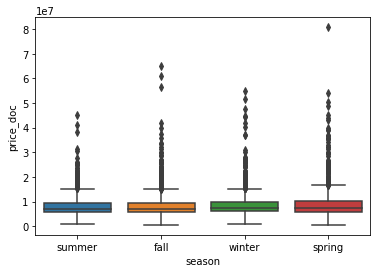

In [302]:
sns.boxplot(x='season',y='price_doc',data =df)

In [303]:
corr_season = df[['season','price_doc']].groupby('season')
scipy.stats.f_oneway(corr_season.get_group('summer')['price_doc'],corr_season.get_group('winter')['price_doc'],
                     corr_season.get_group('fall')['price_doc'],corr_season.get_group('spring')['price_doc'])

F_onewayResult(statistic=7.883850416502962, pvalue=2.9975086788434207e-05)

<AxesSubplot:xlabel='product_type', ylabel='price_doc'>

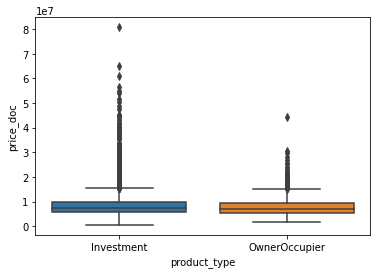

In [151]:
sns.boxplot(x='product_type',y='price_doc',data =df)

In [153]:
corr_producttype = df[['product_type','price_doc']].groupby('product_type')
scipy.stats.f_oneway(corr_producttype.get_group('Investment')['price_doc'],corr_producttype.get_group('OwnerOccupier')['price_doc'])

F_onewayResult(statistic=1.5694909134945847, pvalue=0.21031477618460714)

<AxesSubplot:xlabel='culture_objects_top_25', ylabel='price_doc'>

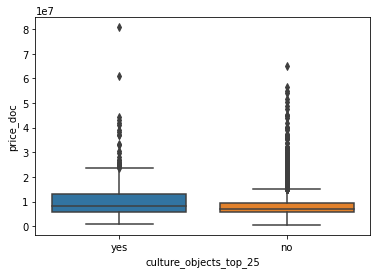

In [161]:
sns.boxplot(x='culture_objects_top_25',y='price_doc',data =df)

In [163]:
corr_culture = df[['culture_objects_top_25','price_doc']].groupby('culture_objects_top_25')
scipy.stats.f_oneway(corr_culture.get_group('yes')['price_doc'],corr_culture.get_group('no')['price_doc'])

F_onewayResult(statistic=122.57524960268184, pvalue=2.6728481316199416e-28)

<AxesSubplot:xlabel='thermal_power_plant_raion', ylabel='price_doc'>

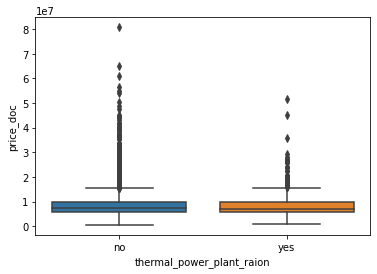

In [164]:
sns.boxplot(x='thermal_power_plant_raion',y='price_doc',data =df)

In [165]:
corr_therm = df[['thermal_power_plant_raion','price_doc']].groupby('thermal_power_plant_raion')
scipy.stats.f_oneway(corr_therm.get_group('yes')['price_doc'],corr_therm.get_group('no')['price_doc'])

F_onewayResult(statistic=0.1141169544411234, pvalue=0.7355130435811896)

<AxesSubplot:xlabel='incineration_raion', ylabel='price_doc'>

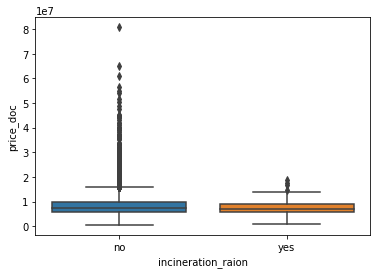

In [167]:
sns.boxplot(x='incineration_raion',y='price_doc',data =df)

In [168]:
corr_inci = df[['incineration_raion','price_doc']].groupby('incineration_raion')
scipy.stats.f_oneway(corr_inci.get_group('yes')['price_doc'],corr_inci.get_group('no')['price_doc'])

F_onewayResult(statistic=15.00870959011178, pvalue=0.0001078045316001053)

<AxesSubplot:xlabel='oil_chemistry_raion', ylabel='price_doc'>

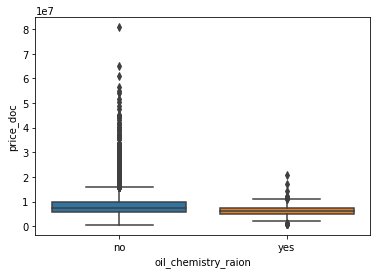

In [169]:
sns.boxplot(x='oil_chemistry_raion',y='price_doc',data =df)

In [170]:
corr_oilc = df[['oil_chemistry_raion','price_doc']].groupby('oil_chemistry_raion')
scipy.stats.f_oneway(corr_oilc.get_group('yes')['price_doc'],corr_oilc.get_group('no')['price_doc'])

F_onewayResult(statistic=20.40928741754294, pvalue=6.335375018495018e-06)

<AxesSubplot:xlabel='radiation_raion', ylabel='price_doc'>

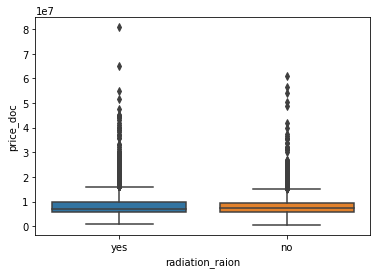

In [171]:
sns.boxplot(x='radiation_raion',y='price_doc',data =df)

In [172]:
corr_rad = df[['radiation_raion','price_doc']].groupby('radiation_raion')
scipy.stats.f_oneway(corr_rad.get_group('yes')['price_doc'],corr_rad.get_group('no')['price_doc'])

F_onewayResult(statistic=4.838252367830965, pvalue=0.027861409711447807)

<AxesSubplot:xlabel='railroad_terminal_raion', ylabel='price_doc'>

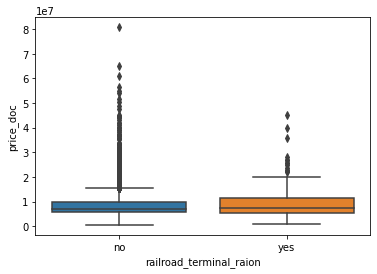

In [173]:
sns.boxplot(x='railroad_terminal_raion',y='price_doc',data =df)

In [174]:
corr_railt = df[['railroad_terminal_raion','price_doc']].groupby('railroad_terminal_raion')
scipy.stats.f_oneway(corr_railt.get_group('yes')['price_doc'],corr_railt.get_group('no')['price_doc'])

F_onewayResult(statistic=11.391121413281596, pvalue=0.0007412003777758245)

<AxesSubplot:xlabel='big_market_raion', ylabel='price_doc'>

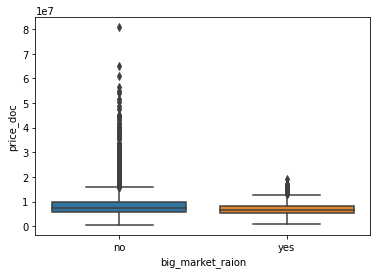

In [175]:
sns.boxplot(x='big_market_raion',y='price_doc',data =df)

In [176]:
corr_bmar = df[['big_market_raion','price_doc']].groupby('big_market_raion')
scipy.stats.f_oneway(corr_bmar.get_group('yes')['price_doc'],corr_bmar.get_group('no')['price_doc'])

F_onewayResult(statistic=34.20588910960346, pvalue=5.137671370142033e-09)

<AxesSubplot:xlabel='nuclear_reactor_raion', ylabel='price_doc'>

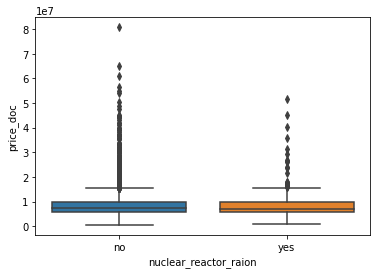

In [177]:
sns.boxplot(x='nuclear_reactor_raion',y='price_doc',data =df)

In [178]:
corr_nuc = df[['nuclear_reactor_raion','price_doc']].groupby('nuclear_reactor_raion')
scipy.stats.f_oneway(corr_nuc.get_group('yes')['price_doc'],corr_nuc.get_group('no')['price_doc']) 

F_onewayResult(statistic=0.733965086556121, pvalue=0.39162465847118977)

<AxesSubplot:xlabel='detention_facility_raion', ylabel='price_doc'>

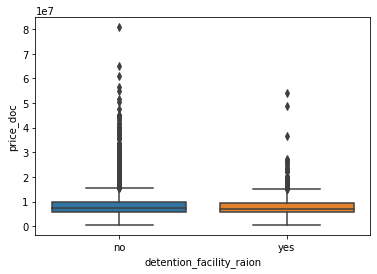

In [179]:
sns.boxplot(x='detention_facility_raion',y='price_doc',data =df)

In [182]:
corr_det = df[['detention_facility_raion','price_doc']].groupby('detention_facility_raion')
scipy.stats.f_oneway(corr_det.get_group('yes')['price_doc'],corr_det.get_group('no')['price_doc']) 

F_onewayResult(statistic=3.4127305230427463, pvalue=0.064729386740769)

<AxesSubplot:xlabel='water_1line', ylabel='price_doc'>

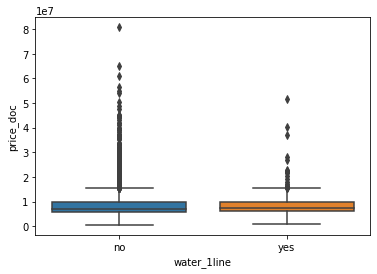

In [183]:
sns.boxplot(x='water_1line',y='price_doc',data =df)

In [184]:
corr_wat = df[['water_1line','price_doc']].groupby('water_1line')
scipy.stats.f_oneway(corr_wat.get_group('yes')['price_doc'],corr_wat.get_group('no')['price_doc'])

F_onewayResult(statistic=0.4615355112544749, pvalue=0.49692537372250256)

<AxesSubplot:xlabel='big_road1_1line', ylabel='price_doc'>

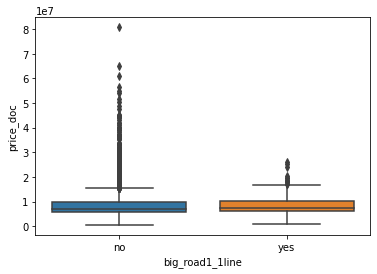

In [185]:
sns.boxplot(x='big_road1_1line',y='price_doc',data =df)

In [186]:
corr_broad = df[['big_road1_1line','price_doc']].groupby('big_road1_1line')
scipy.stats.f_oneway(corr_broad.get_group('yes')['price_doc'],corr_broad.get_group('no')['price_doc'])

F_onewayResult(statistic=0.26220754560250975, pvalue=0.6086206349751513)

<AxesSubplot:xlabel='railroad_1line', ylabel='price_doc'>

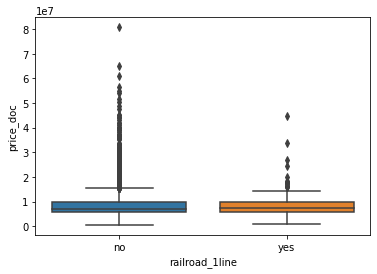

In [187]:
sns.boxplot(x='railroad_1line',y='price_doc',data =df)

In [188]:
corr_rroad = df[['railroad_1line','price_doc']].groupby('railroad_1line')
scipy.stats.f_oneway(corr_rroad.get_group('yes')['price_doc'],corr_rroad.get_group('no')['price_doc'])

F_onewayResult(statistic=0.13343315329317412, pvalue=0.7149075694737324)

<AxesSubplot:xlabel='ecology', ylabel='price_doc'>

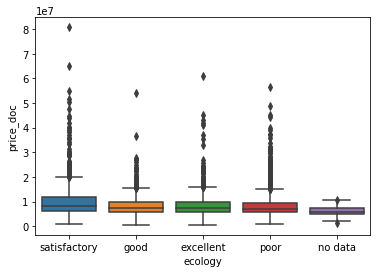

In [189]:
sns.boxplot(x='ecology',y='price_doc',data =df)

In [190]:
corr_eco = df[['ecology','price_doc']].groupby('ecology')
scipy.stats.f_oneway(corr_eco.get_group('good')['price_doc'],corr_eco.get_group('excellent')['price_doc'],
                     corr_eco.get_group('poor')['price_doc'],corr_eco.get_group('satisfactory')['price_doc'],
                    corr_eco.get_group('no data')['price_doc'])

F_onewayResult(statistic=48.41490126405319, pvalue=2.463906340905899e-40)

<AxesSubplot:xlabel='modern_education_share', ylabel='price_doc'>

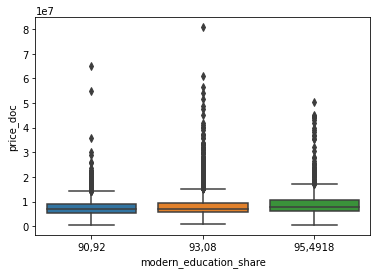

In [191]:
sns.boxplot(x='modern_education_share',y='price_doc',data =df)

In [193]:
corr_new_edu = df[['modern_education_share','price_doc']].groupby('modern_education_share')
scipy.stats.f_oneway(corr_new_edu.get_group('90,92')['price_doc'],corr_new_edu.get_group('93,08')['price_doc'])

F_onewayResult(statistic=16.468924099998926, pvalue=4.996786951897507e-05)

<AxesSubplot:xlabel='old_education_build_share', ylabel='price_doc'>

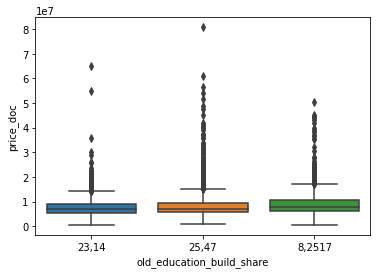

In [195]:
sns.boxplot(x='old_education_build_share',y='price_doc',data =df)

In [194]:
corr_old_edu = df[['old_education_build_share','price_doc']].groupby('old_education_build_share')
scipy.stats.f_oneway(corr_old_edu.get_group('23,14')['price_doc'],corr_old_edu.get_group('25,47')['price_doc'])

F_onewayResult(statistic=16.468924099998926, pvalue=4.996786951897507e-05)

In [196]:
0.02-0.05

-0.030000000000000002

In [111]:
df.select_dtypes('object').describe()

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,modern_education_share,old_education_build_share
count,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665
unique,570,2,121,2,2,2,2,2,2,2,2,2,2,2,2,5,3,3
top,2014-12-16,Investment,Mar'ino,no,no,no,no,no,no,no,no,no,no,no,no,poor,"93,08","25,47"
freq,65,7801,243,8083,7965,8360,8515,4424,8342,8189,8267,7517,8185,8416,8458,3408,5856,5856


In [247]:
non_numeric = df.select_dtypes('object').columns

In [248]:
df[non_numeric].isnull().sum()

timestamp                    0
sub_area                     0
old_education_build_share    0
dtype: int64

In [114]:
df[non_numeric].nunique()

timestamp                    570
product_type                   2
sub_area                     121
culture_objects_top_25         2
thermal_power_plant_raion      2
incineration_raion             2
oil_chemistry_raion            2
radiation_raion                2
railroad_terminal_raion        2
big_market_raion               2
nuclear_reactor_raion          2
detention_facility_raion       2
water_1line                    2
big_road1_1line                2
railroad_1line                 2
ecology                        5
modern_education_share         3
old_education_build_share      3
dtype: int64

In [142]:
df.old_education_build_share.unique()

array(['23,14', '25,47', '8,2517'], dtype=object)

In [105]:
df.product_type.value_counts()

0    7801
1     864
Name: product_type, dtype: int64

In [146]:
df = pd.get_dummies(df,columns=['product_type','culture_objects_top_25','thermal_power_plant_raion','incineration_raion',
                                'oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion',
                               'nuclear_reactor_raion','detention_facility_raion','water_1line','big_road1_1line',
                               'railroad_1line'],drop_first=True)

In [132]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,num_room,state,sub_area,indust_part,university_top_20_raion,...,price_doc,modern_education_share,old_education_build_share,product_type_OwnerOccupier,culture_objects_top_25_yes,thermal_power_plant_raion_yes,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes
9753,2013-08-12,59,42.0,3.0,9.0,3.0,3.0,Ramenki,0.019509,1,...,9800000,"90,92","23,14",0,1,0,0,0,1,0
9754,2013-08-12,44,27.0,1.0,4.0,2.0,3.0,Solncevo,0.371149,0,...,5150000,"90,92","23,14",0,0,0,0,0,0,0
9759,2013-08-12,57,29.0,13.0,22.0,2.0,2.0,Zjuzino,0.000000,2,...,2000000,"90,92","23,14",0,0,0,0,0,1,0
9762,2013-08-12,61,43.0,1.0,9.0,3.0,3.0,Jasenevo,0.037178,0,...,8450000,"90,92","23,14",0,0,0,0,0,1,0
9765,2013-08-12,37,35.0,11.0,14.0,1.0,2.0,Horoshevo-Mnevniki,0.111627,0,...,7000000,"90,92","23,14",0,0,1,0,0,1,0


In [133]:
df.shape

(8665, 51)

In [180]:
correlation=df.corr()

In [181]:
abs(correlation['price_doc']).sort_values(ascending = False)

price_doc                  1.000000
full_sq                    0.667406
life_sq                    0.513830
num_room                   0.464816
max_floor                  0.196260
sadovoe_km                 0.193598
kremlin_km                 0.189340
bulvar_ring_km             0.186496
zd_vokzaly_avto_km         0.183005
ttk_km                     0.180172
ID_metro                   0.177723
mkad_km                    0.165459
nuclear_reactor_km         0.155868
sport_objects_raion        0.148193
cafe_avg_price_2000        0.146989
office_km                  0.143005
mosque_km                  0.138648
state                      0.136513
catering_km                0.133433
floor                      0.130412
build_count_1971-1995      0.128444
park_km                    0.127123
theater_km                 0.125495
university_top_20_raion    0.124166
metro_km_walk              0.123750
university_km              0.115288
hospice_morgue_km          0.113092
big_church_km              0

In [86]:
df['build_count_1971-1995'].describe()

count    8324.000000
mean       90.154253
std        55.379145
min         0.000000
25%        47.000000
50%        76.000000
75%       126.000000
max       246.000000
Name: build_count_1971-1995, dtype: float64

<AxesSubplot:ylabel='Frequency'>

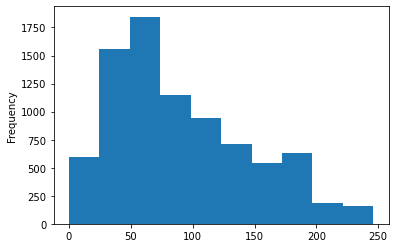

In [87]:
df['build_count_1971-1995'].plot(kind='hist')

In [88]:
n_build = df['build_count_1971-1995'].interpolate()
df['build_count_1971-1995'].fillna(n_build,inplace=True)

In [75]:
df.life_sq.describe()

count    9490.000000
mean       33.475659
std        19.636455
min         0.000000
25%        20.000000
50%        30.000000
75%        42.000000
max       637.000000
Name: life_sq, dtype: float64

<AxesSubplot:ylabel='Frequency'>

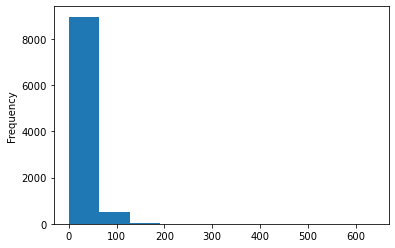

In [77]:
df.life_sq.plot(kind='hist')

In [66]:
df.cafe_avg_price_1000.nunique()

1449

In [67]:
df.cafe_avg_price_1000.describe()

count    11601.000000
mean       958.367386
std        286.479200
min        400.000000
25%        750.000000
50%        915.000000
75%       1107.140000
max       3250.000000
Name: cafe_avg_price_1000, dtype: float64

In [68]:
df.cafe_avg_price_2000.describe()

count    13229.000000
mean       969.840855
std        244.836850
min        400.000000
25%        825.000000
50%        925.710000
75%       1048.550000
max       2833.330000
Name: cafe_avg_price_2000, dtype: float64

In [76]:
small_size,large_size = df.life_sq.quantile([0.1,0.99])
df = df[df['life_sq'].between(small_size,large_size)]
low_price,high_price 

(18.0, 100.0)

In [49]:
num_mode = df['num_room'].mode()[0]
df['num_room'].fillna(num_mode,inplace=True)

In [50]:
df.num_room.isnull().sum()

0

In [51]:
df.state.nunique()

5

In [52]:
df.state.value_counts()

2.0     4782
3.0     4641
1.0     3607
4.0      333
33.0       1
Name: state, dtype: int64

In [53]:
df.state.unique()

array([nan,  3.,  2.,  4.,  1., 33.])

In [63]:
df.state.isnull().sum()

0

In [58]:
low_state,high_state = df.state.quantile([0.1,0.99])
df = df[df['state'].between(low,high)]
low_state,high_state 

(1.0, 4.0)

In [ ]:
df

In [34]:
df[['life_sq']].corrwith(df['full_sq'])

life_sq    0.243222
dtype: float64

In [14]:
df1.num_room.unique()

array([ 2.,  3., nan,  1.,  4.,  6.,  0.,  5., 19., 10.,  8.,  7., 17.,
        9.])

In [15]:
df1.num_room.value_counts()

2.0     7967
1.0     7489
3.0     4595
4.0      413
5.0       39
0.0       14
6.0        9
8.0        3
10.0       2
19.0       1
7.0        1
17.0       1
9.0        1
Name: num_room, dtype: int64

In [428]:
df1[df1['num_room'].isnull()].index.to_list()

[9755,
 9756,
 9757,
 9758,
 9760,
 9763,
 9768,
 9770,
 9771,
 9773,
 9776,
 9777,
 9779,
 9784,
 9788,
 9789,
 9790,
 9792,
 9797,
 9798,
 9800,
 9803,
 9804,
 9805,
 9806,
 9808,
 9809,
 9811,
 9812,
 9813,
 9815,
 9818,
 9819,
 9828,
 9831,
 9832,
 9833,
 9835,
 9837,
 9839,
 9840,
 9841,
 9844,
 9846,
 9847,
 9848,
 9851,
 9852,
 9856,
 9858,
 9860,
 9861,
 9862,
 9863,
 9864,
 9866,
 9868,
 9869,
 9871,
 9873,
 9875,
 9876,
 9879,
 9880,
 9881,
 9882,
 9883,
 9884,
 9887,
 9888,
 9889,
 9891,
 9892,
 9893,
 9894,
 9896,
 9897,
 9898,
 9900,
 9902,
 9903,
 9906,
 9917,
 9918,
 9919,
 9921,
 9923,
 9925,
 9927,
 9928,
 9929,
 9933,
 9934,
 9935,
 9936,
 9941,
 9948,
 9952,
 9953,
 9955,
 9957,
 9959,
 9962,
 9963,
 9968,
 9971,
 9972,
 9975,
 9977,
 9981,
 9982,
 9986,
 9987,
 9990,
 9991,
 9992,
 9998,
 9999,
 10001,
 10002,
 10003,
 10004,
 10012,
 10014,
 10022,
 10024,
 10029,
 10032,
 10037,
 10040,
 10041,
 10042,
 10044,
 10047,
 10050,
 10051,
 10054,
 10060,
 10062,
 10064

In [ ]:
df1[df1['child_on_acc_pre_school'].isnull()].index.to_list()

In [430]:
df1.child_on_acc_pre_school.nunique()

2

In [431]:
df1.child_on_acc_pre_school.unique()

array(['3,013', '16,765', nan], dtype=object)

In [432]:
df1.child_on_acc_pre_school.value_counts()

16,765    13662
3,013      3818
Name: child_on_acc_pre_school, dtype: int64

In [433]:
df1.child_on_acc_pre_school.mode()

0    16,765
dtype: object

In [434]:
df1.metro_km_walk.nunique()

9105

In [435]:
df1.metro_km_walk.mean()

3.7935474844034567

In [37]:
df.metro_km_walk.describe()

count    16635.000000
mean         2.306228
std          1.681288
min          0.557918
25%          1.121589
50%          1.722233
75%          2.730809
max          7.468867
Name: metro_km_walk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

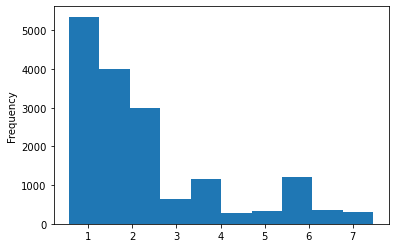

In [38]:
df.metro_km_walk.plot(kind='hist')

In [16]:
low,high = df1.metro_km_walk.quantile([0.1,0.9])
df1 = df1[df1['metro_km_walk'].between(low,high)]

7.468866947

In [17]:
df1 = df1[df1['metro_km_walk'].between(low,high)]

In [18]:
df1.metro_km_walk.isnull().sum()

0

In [35]:
n_mode = df['num_room'].mode()
df['num_room'] = df['num_room'].fillna(value= n_mode,inplace=True)


In [36]:
df1.num_room.isnull().sum()

184

In [449]:
df1.child_on_acc_pre_school.fillna(df1.child_on_acc_pre_school.mode(),inplace=True)
df1.num_room.fillna(df1.num_room.mode(),inplace=True)

C:\Users\YUSUF\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df1.loc[df1.child_on_acc_pre_school.isnull(),'child_on_acc_pre']

In [418]:
df.shape

(20719, 169)

In [454]:
numeric = df.select_dtypes('number').columns.to_list()
non_num = df.select_dtypes('object').columns

In [350]:
numeric

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'school_quota',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'young_all',
 'young_male',
 'young_female',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 'build_count_foam',
 'build_count_before_1920',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'ID_metro',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'ID_railroad_station_walk',
 'public_transport_station_km',
 'water_km',
 'mkad_km',
 'ttk_km',
 'sadovoe_km

In [4]:

corr_d = {}
for column in df.drop(columns='price_doc').select_dtypes('number').columns:
    corr_d[column]= df[[column]].corrwith(df['price_doc'])
relevant=[]
irrelevant =[]
for i in corr_d.keys():
    if abs(corr_d[i][0]) > 0.15:
        relevant.append(i)
    else:
        irrelevant.append(i)
        
    

In [398]:
relevant

['full_sq',
 'num_room',
 'area_m',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 'metro_km_walk',
 'school_km',
 'park_km',
 'ttk_km',
 'sadovoe_km',
 'bulvar_ring_km',
 'kremlin_km',
 'big_road2_km',
 'zd_vokzaly_avto_km',
 'bus_terminal_avto_km',
 'nuclear_reactor_km',
 'thermal_power_plant_km',
 'market_shop_km',
 'stadium_km',
 'hospice_morgue_km',
 'detention_facility_km',
 'public_healthcare_km',
 'university_km',
 'office_km',
 'big_church_km',
 'mosque_km',
 'theater_km',
 'museum_km',
 'exhibition_km',
 'catering_km',
 'leisure_count_500']

In [366]:
irrelevant

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'kitch_sq',
 'state',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'school_quota',
 'school_education_centers_top_20_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'young_all',
 'young_male',
 'young_female',
 'work_male',
 'work_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 'build_count_foam',
 'build_count_before_1920',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'ID_metro',
 'kindergarten_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'ID_railroad_station_walk',
 'public_transport_station_km',
 'water_km',
 'mkad_km',
 'big_road1_km',
 'ID_big_road1',
 'ID_big_road2',
 'railroad_km',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'oil_chemistry_km',
 'big_market_km',
 'additional_education_km',
 'church_synagogue_km',
 'prom_part_500',
 'trc_cou

In [417]:
df[['material']].corrwith(df['price_doc'])

material    0.065622
dtype: float64

In [344]:
abs(df[numeric].drop(columns = 'price_doc').corrwith(df['price_doc'])).sort_values().head(50)

water_pipes_share                             2.147751e-16
heating_share                                 2.147751e-16
baths_share                                   2.147751e-16
build_year                                    2.162476e-03
students_state_oneshift                       3.617132e-03
prom_part_500                                 4.474152e-03
deposits_growth                               4.979984e-03
church_count_500                              6.833545e-03
water_km                                      8.427672e-03
mosque_count_500                              1.073757e-02
income_per_cap                                1.135573e-02
mortgage_value                                1.147808e-02
school_quota                                  1.406483e-02
build_count_1971-1995                         1.556525e-02
build_count_foam                              1.635124e-02
unemployment                                  1.771157e-02
ID_railroad_station_walk                      1.773051e-

In [293]:
abs(df[numeric].drop(columns = 'price_doc').corrwith(df['price_doc'])).sort_values().tail(50)

office_raion                         0.145718
school_km                            0.146208
hospital_beds_raion                  0.147137
additional_education_km              0.147853
hospice_morgue_km                    0.150453
shopping_centers_raion               0.150825
raion_popul                          0.151587
ice_rink_km                          0.152075
bus_terminal_avto_km                 0.160176
leisure_count_500                    0.160470
big_road2_km                         0.160778
ts_km                                0.161826
life_sq                              0.165606
university_top_20_raion              0.165827
mosque_km                            0.166226
area_m                               0.166981
ekder_female                         0.168338
ekder_all                            0.173264
public_healthcare_km                 0.173726
market_shop_km                       0.174460
shopping_centers_km                  0.178293
ekder_male                        

In [378]:
df.state.unique()

array([nan,  3.,  1.,  2.,  4., 33.])

In [419]:
df.isnull().sum().sort_values(ascending = False).head(40)

school_quota                       4501
life_sq                            4198
build_year                         4182
cafe_avg_price_1000                4105
state                              4103
build_count_before_1920            3287
build_count_after_1995             3287
build_count_1971-1995              3287
build_count_1946-1970              3287
build_count_foam                   3287
construction_value                 3239
baths_share                        3239
water_pipes_share                  3239
lodging_sqm_per_cap                3239
overdue_wages_per_cap              3239
divorce_rate                       3239
marriages_per_1000_cap             3239
fin_res_per_cap                    3239
infant_mortarity_per_1000_cap      3239
profitable_enterpr_share           3239
grp                                3239
heating_share                      3239
housing_fund_sqm                   3239
power_clinics                      3239
child_on_acc_pre_school            3239


In [315]:
df['build_year'].describe()

count    1.686600e+04
mean     3.068057e+03
std      1.543878e+05
min      0.000000e+00
25%      1.967000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [ ]:
df[df['build_year'].isnull()].index.to_list()

In [82]:
col = []
for column in df.columns:
    if 'buil' in column:
        col.append(column)
print(col)

['build_count_1971-1995', 'old_education_build_share']


In [83]:
df[col].corr()

,build_count_1971-1995
build_count_1971-1995,1.0


In [387]:
df[col].corrwith(df['price_doc']) 

university_top_20_raion    0.156927
university_km             -0.224907
dtype: float64

In [388]:
df[col].isnull().sum()

university_top_20_raion    0
university_km              0
dtype: int64

In [389]:
df[col].nunique()

university_top_20_raion       4
university_km              9114
dtype: int64

In [127]:
df[col].value_counts(normalize=True)

1.110329    0.032030
0.524839    0.019789
1.263289    0.019100
1.363601    0.011946
0.718454    0.010469
              ...   
0.682397    0.000033
1.007005    0.000033
0.971842    0.000033
0.539061    0.000033
0.738539    0.000033
Name: water_km, Length: 11851, dtype: float64

In [399]:
df[['theater_km',
 'museum_km',
 'exhibition_km',
 'catering_km',
 'leisure_count_500']].corr()

,theater_km,museum_km,exhibition_km,catering_km,leisure_count_500
theater_km,1.000000,0.908082,0.658486,0.504411,-0.156554
museum_km,0.908082,1.000000,0.668308,0.541343,-0.141879
exhibition_km,0.658486,0.668308,1.000000,0.561466,-0.127078
catering_km,0.504411,0.541343,0.561466,1.000000,-0.088673
leisure_count_500,-0.156554,-0.141879,-0.127078,-0.088673,1.000000


In [401]:
df[['theater_km',
 'museum_km',
 'exhibition_km',
 'catering_km',
 'leisure_count_500']].corrwith(df['price_doc'])

theater_km          -0.224170
museum_km           -0.205033
exhibition_km       -0.213294
catering_km         -0.213763
leisure_count_500    0.176053
dtype: float64

In [402]:
df[['theater_km',
 'museum_km',
 'exhibition_km',
 'catering_km',
 'leisure_count_500']].isnull().sum()

theater_km           0
museum_km            0
exhibition_km        0
catering_km          0
leisure_count_500    0
dtype: int64

In [354]:
df[df['build_year'].isnull()].index.to_series().tail(40)

30323    30323
30324    30324
30327    30327
30329    30329
30343    30343
30348    30348
30351    30351
30352    30352
30353    30353
30355    30355
30360    30360
30369    30369
30370    30370
30375    30375
30381    30381
30384    30384
30386    30386
30387    30387
30393    30393
30395    30395
30396    30396
30398    30398
30400    30400
30404    30404
30405    30405
30413    30413
30414    30414
30415    30415
30424    30424
30426    30426
30428    30428
30439    30439
30443    30443
30447    30447
30448    30448
30450    30450
30455    30455
30459    30459
30465    30465
30468    30468
dtype: int64

In [371]:
df.loc[n_17]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,trc_count_500,cafe_count_500,church_count_500,mosque_count_500,leisure_count_500,market_count_500,cafe_avg_price_1000,cafe_avg_price_2000,cafe_avg_price_3000,price_doc
3354,3357,2012-08-27,64,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3263575
3388,3391,2012-08-29,29,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,1885866
3413,3416,2012-08-30,61,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3605440
3624,3627,2012-09-13,82,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3880225
3670,3673,2012-09-17,82,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,5068854
3773,3776,2012-09-21,43,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3233235
4061,4064,2012-10-05,82,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,5068854
4098,4101,2012-10-08,67,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3501127
4106,4109,2012-10-09,44,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3112775
4112,4115,2012-10-09,82,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,4433400


In [367]:
n_17 = df[df.isnull().sum(axis = 1) == 17].index.to_list()

In [364]:
df.isnull().sum(axis = 1).sort_values(ascending = False).value_counts()

0     7680
1     6113
6     3836
7     3395
2     1546
8     1298
10    1116
9      989
3      943
4      765
14     665
15     605
5      390
13     373
11     275
12     232
16     190
17      60
dtype: int64

In [322]:
for c in df.columns:
    print(c)

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type
sub_area
area_m
raion_popul
green_zone_part
indust_part
school_quota
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
young_all
young_male
young_female
work_male
work_female
ekder_all
ekder_male
ekder_female
16_29_all
16_29_male
16_29_female
build_count_foam
build_count_before_1920
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
ID_metro
metro_km_walk
kindergarten_km
school_km
park_km
green_zone_km
industrial_km
water_treatment_km
cemetery_km
incineration_km
ID_railroad_station_walk
public_transport_station_km
w

In [334]:
col = []
for column in df.columns:
    if 'cafe' in column:
        col.append(column)
print(col)

['cafe_count_500', 'cafe_avg_price_1000', 'cafe_avg_price_2000', 'cafe_avg_price_3000', 'cafe_avg_price_5000']


In [335]:
df[col].corr()

,cafe_count_500,cafe_avg_price_1000,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_5000
cafe_count_500,1.000000,0.170041,0.165048,0.066729,0.130374
cafe_avg_price_1000,0.170041,1.000000,0.466072,0.156155,0.212283
cafe_avg_price_2000,0.165048,0.466072,1.000000,0.488746,0.461604
cafe_avg_price_3000,0.066729,0.156155,0.488746,1.000000,0.681534
cafe_avg_price_5000,0.130374,0.212283,0.461604,0.681534,1.000000


In [208]:
df[col].head()

,office_raion,office_km,office_count_500
0,1,0.637189,0
1,0,0.688796,0
2,1,1.543049,0
3,4,0.934273,0
4,93,0.077901,15


In [207]:
df[col[2]].describe()

count    30471.000000
mean         0.740868
std          2.283370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         34.000000
Name: office_count_500, dtype: float64

In [267]:
df[col].corr()

,thermal_power_plant_km
thermal_power_plant_km,1.0


In [291]:
df[col].corrwith(df['price_doc'])

big_church_km         -0.193540
church_synagogue_km   -0.118197
church_count_500       0.014658
dtype: float64

In [123]:
df[['metro_km_avto','metro_km_walk']].corrwith(df['ID_metro'])

metro_km_avto    0.116389
metro_km_walk    0.121894
dtype: float64

In [122]:
df[['metro_km_avto','metro_km_walk']].corr()

,metro_km_avto,metro_km_walk
metro_km_avto,1.000000,0.986754
metro_km_walk,0.986754,1.000000


In [120]:
df[['metro_km_avto']].corrwith(df['metro_min_avto'])

metro_km_avto    0.945035
dtype: float64

In [119]:
df[['metro_km_walk']].corrwith(df['metro_min_walk'])

metro_km_walk    1.0
dtype: float64

In [115]:
df[['work_all','ekder_all']].corrwith(df['16_29_all'])

work_all     0.188778
ekder_all    0.234737
dtype: float64

In [108]:
df[['young_all','16_29_all']].corrwith(df['full_all'])

young_all    0.164469
16_29_all    0.999370
dtype: float64

In [102]:
df[['0_6_all','7_14_all','0_17_all','0_13_all']].corrwith(df['young_all'])

0_6_all     0.996408
7_14_all    0.997057
0_17_all    0.999712
0_13_all    0.999885
dtype: float64

In [101]:
df[['0_6_all','7_14_all','0_17_all','16_29_all','0_13_all']].corrwith(df['full_all'])

0_6_all      0.166804
7_14_all     0.162308
0_17_all     0.168744
16_29_all    0.999370
0_13_all     0.165449
dtype: float64

In [97]:
df[['work_female','ekder_female']].corrwith(df['16_29_female'])

work_female     0.178989
ekder_female    0.216162
dtype: float64

In [90]:
df[['young_female','16_29_female']].corrwith(df['female_f'])

young_female    0.165069
16_29_female    0.999163
dtype: float64

In [91]:
df[['work_female','ekder_female']].corrwith(df['16_29_female'])

work_female     0.178989
ekder_female    0.216162
dtype: float64

In [88]:
df[['work_male','ekder_male']].corrwith(df['16_29_male'])

work_male     0.197536
ekder_male    0.273703
dtype: float64

In [86]:
df[['young_male','16_29_male']].corrwith(df['male_f'])

young_male    0.163631
16_29_male    0.999215
dtype: float64

In [79]:
df[['0_6_female','7_14_female','0_17_female','16_29_female','0_13_female']].corrwith(df['female_f'])

0_6_female      0.165627
7_14_female     0.164383
0_17_female     0.171031
16_29_female    0.999163
0_13_female     0.165951
dtype: float64

In [80]:
df[['0_6_female','7_14_female','0_17_female','0_13_female']].corrwith(df['young_female'])

0_6_female     0.995505
7_14_female    0.996196
0_17_female    0.999673
0_13_female    0.999871
dtype: float64

In [71]:
df[['0_6_male','7_14_male','0_17_male','16_29_male','0_13_male']].corrwith(df['male_f'])

0_6_male      0.167613
7_14_male     0.159887
0_17_male     0.166294
16_29_male    0.999215
0_13_male     0.164690
dtype: float64

In [73]:
df[['0_6_male','7_14_male','0_17_male','0_13_male']].corrwith(df['young_male'])

0_6_male     0.996748
7_14_male    0.997411
0_17_male    0.999687
0_13_male    0.999861
dtype: float64

In [51]:
df[['children_school','preschool_km']].corrwith(df['children_preschool'])

children_school    0.987113
preschool_km      -0.328375
dtype: float64

In [53]:
df[['children_school','preschool_km','school_quota','school_education_centers_raion','school_km','school_education_centers_top_20_raion']].corrwith(df['children_preschool'])

children_school                          0.987113
preschool_km                            -0.328375
school_quota                             0.850084
school_education_centers_raion           0.826125
school_km                               -0.329115
school_education_centers_top_20_raion    0.103451
dtype: float64

In [63]:
df[['school_education_centers_top_20_raion']].corrwith(df['school_km'])

school_education_centers_top_20_raion   -0.098399
dtype: float64

In [ ]:
d2[['cafe_count_1000_price_1500','cafe_count_1500_price_1500','cafe_count_2000_price_1500','cafe_count_3000_price_1500','cafe_count_5000_price_1500']].corrwith(d2['cafe_count_500_price_1500'])

In [148]:
d2[['cafe_count_1000_price_1500','cafe_count_1500_price_1500','cafe_count_2000_price_1500','cafe_count_3000_price_1500','cafe_count_5000_price_1500']].corrwith(d2['cafe_count_500_price_1500'])

cafe_count_1000_price_1500    0.932939
cafe_count_1500_price_1500    0.919007
cafe_count_2000_price_1500    0.917072
cafe_count_3000_price_1500    0.910844
cafe_count_5000_price_1500    0.835017
dtype: float64

In [137]:
d2[['cafe_count_1000_price_1000','cafe_count_1500_price_1000','cafe_count_2000_price_1000','cafe_count_3000_price_1000','cafe_count_5000_price_1000']].corrwith(d2['cafe_count_500_price_1000'])

cafe_count_1000_price_1000    0.887078
cafe_count_1500_price_1000    0.848569
cafe_count_2000_price_1000    0.836057
cafe_count_3000_price_1000    0.837957
cafe_count_5000_price_1000    0.780108
dtype: float64

In [131]:
d2[['cafe_count_1000_na_price','cafe_count_1500_na_price','cafe_count_2000_na_price','cafe_count_3000_na_price','cafe_count_5000_na_price']].corrwith(d2['cafe_count_500_na_price'])

cafe_count_1000_na_price    0.939495
cafe_count_1500_na_price    0.921705
cafe_count_2000_na_price    0.917378
cafe_count_3000_na_price    0.886812
cafe_count_5000_na_price    0.760886
dtype: float64

In [125]:
d2[['cafe_count_1000','cafe_count_1500','cafe_count_2000','cafe_count_3000','cafe_count_5000']].corrwith(d2['cafe_count_500'])

cafe_count_1000    0.973318
cafe_count_1500    0.966895
cafe_count_2000    0.962386
cafe_count_3000    0.948012
cafe_count_5000    0.844566
dtype: float64

In [122]:
d2[['office_raion','office_km']].corrwith(d2['office_count_500'])

office_raion    0.822507
office_km      -0.251179
dtype: float64

In [117]:
d2[['office_count_1000','office_count_1500','office_count_2000','office_count_3000','office_count_5000']].corrwith(d2['office_count_500'])

office_count_1000    0.924542
office_count_1500    0.898324
office_count_2000    0.876347
office_count_3000    0.861026
office_count_5000    0.842617
dtype: float64

In [114]:
d2[['office_count_500']].corrwith(d2['office_sqm_500'])

office_count_500    0.762228
dtype: float64

In [105]:
d2[['trc_count_1000','trc_count_1500','trc_count_2000','trc_count_3000','trc_count_5000']].corrwith(d2['trc_count_500'])

trc_count_1000    0.801368
trc_count_1500    0.718072
trc_count_2000    0.664744
trc_count_3000    0.593188
trc_count_5000    0.465950
dtype: float64

In [95]:
d2[['public_transport_station_min_walk']].corrwith(d2['public_transport_station_km'])

public_transport_station_min_walk    1.0
dtype: float64

In [88]:
d2[['sport_count_1000','sport_count_1500','sport_count_2000','sport_count_3000','sport_count_5000']].corrwith(d2['sport_count_500'])

sport_count_1000    0.768921
sport_count_1500    0.671404
sport_count_2000    0.652322
sport_count_3000    0.630054
sport_count_5000    0.589798
dtype: float64

In [ ]:
d2[['green_part_2000','green_part_3000','green_part_5000']].corrwith(d2['green_part_1500'])

In [72]:
d2[['prom_part_2000','prom_part_3000','prom_part_5000']].corrwith(d2['prom_part_1500'])

prom_part_2000    0.930281
prom_part_3000    0.645655
prom_part_5000    0.345346
dtype: float64

In [73]:
d2[['prom_part_2000','prom_part_3000']].corrwith(d2['prom_part_5000'])

prom_part_2000    0.494214
prom_part_3000    0.797903
dtype: float64

In [74]:
d2[['prom_part_2000']].corrwith(d2['prom_part_3000'])

prom_part_2000    0.817621
dtype: float64

In [70]:
d2[['railroad_station_walk_min']].corrwith(d2['railroad_station_walk_km'])

railroad_station_walk_min    1.0
dtype: float64

In [68]:
d2[['num_room']].corrwith(d2.kitch_sq)

num_room    0.01674
dtype: float64

In [67]:
d2[['max_floor']].corrwith(d2.floor)

max_floor    0.453046
dtype: float64

In [63]:
d2.max_floor.nunique()

49

In [64]:
d2.max_floor.value_counts()

17.0     4627
9.0      2973
5.0      2226
12.0     2196
14.0     1337
16.0     1123
1.0       963
22.0      732
25.0      728
0.0       545
24.0      391
8.0       295
10.0      281
3.0       277
4.0       276
15.0      239
19.0      220
20.0      203
18.0      193
6.0       146
7.0       113
2.0       100
23.0       93
21.0       57
13.0       56
11.0       53
30.0       41
40.0       25
27.0       17
32.0       17
26.0       10
28.0       10
48.0        7
37.0        7
29.0        6
39.0        4
31.0        3
33.0        3
34.0        3
99.0        3
47.0        2
36.0        2
45.0        2
38.0        1
42.0        1
57.0        1
44.0        1
117.0       1
41.0        1
Name: max_floor, dtype: int64

In [65]:
d2[d2['max_floor'].isnull()].index.to_list()

[9575,
 9577,
 9579,
 9580,
 9582,
 9585,
 9587,
 9588,
 9589,
 9590,
 9591,
 9595,
 9596,
 9598,
 9599,
 9600,
 9606,
 9607,
 9608,
 9609,
 9610,
 9613,
 9614,
 9615,
 9616,
 9617,
 9622,
 9623,
 9624,
 9625,
 9626,
 9627,
 9628,
 9629,
 9630,
 9631,
 9632,
 9633,
 9634,
 9637,
 9638,
 9639,
 9640,
 9641,
 9642,
 9645,
 9646,
 9647,
 9648,
 9649,
 9650,
 9652,
 9653,
 9654,
 9655,
 9656,
 9657,
 9658,
 9659,
 9660,
 9661,
 9662,
 9664,
 9665,
 9666,
 9667,
 9671,
 9675,
 9677,
 9679,
 9680,
 9681,
 9682,
 9685,
 9688,
 9693,
 9695,
 9697,
 9698,
 9699,
 9702,
 9704,
 9705,
 9707,
 9709,
 9711,
 9713,
 9714,
 9716,
 9719,
 9721,
 9726,
 9727,
 9733,
 9734,
 9736,
 9738,
 9739,
 9740,
 9741,
 9742,
 9744,
 9750,
 9751,
 9755,
 9756,
 9757,
 9758,
 9760,
 9763,
 9768,
 9770,
 9771,
 9773,
 9776,
 9777,
 9779,
 9784,
 9788,
 9789,
 9790,
 9792,
 9797,
 9798,
 9800,
 9803,
 9804,
 9805,
 9806,
 9808,
 9809,
 9811,
 9812,
 9813,
 9815,
 9818,
 9819,
 9828,
 9831,
 9832,
 9833,
 9835,
 9837,

In [66]:
d2['max_floor'].loc[9572:9620]

9572     9.0
9573    12.0
9574     9.0
9575     NaN
9576    20.0
9577     NaN
9578     9.0
9579     NaN
9580     NaN
9581     5.0
9582     NaN
9583    12.0
9584    16.0
9585     NaN
9586    14.0
9587     NaN
9588     NaN
9589     NaN
9590     NaN
9591     NaN
9592     5.0
9593    17.0
9594     9.0
9595     NaN
9596     NaN
9597    16.0
9598     NaN
9599     NaN
9600     NaN
9601    12.0
9602     8.0
9603    22.0
9604    25.0
9605     5.0
9606     NaN
9607     NaN
9608     NaN
9609     NaN
9610     NaN
9611    12.0
9612    12.0
9613     NaN
9614     NaN
9615     NaN
9616     NaN
9617     NaN
9618    17.0
9619    17.0
9620    12.0
Name: max_floor, dtype: float64

In [ ]:
d2.num_room.nunique()

In [ ]:
d2.num_room.value_counts()

In [40]:
d2[d2['num_room'].isnull()].index.to_list()

In [46]:
d2[['cafe_avg_price_1500','cafe_avg_price_2000','cafe_avg_price_3000']].corrwith(d2['cafe_avg_price_5000'])

cafe_avg_price_1500    0.258003
cafe_avg_price_2000    0.478874
cafe_avg_price_3000    0.678036
dtype: float64

In [48]:
d2[['cafe_avg_price_2000','cafe_avg_price_3000']].corrwith(d2['cafe_avg_price_1500'])

cafe_avg_price_2000    0.596934
cafe_avg_price_3000    0.222724
dtype: float64

In [49]:
d2[['cafe_avg_price_2000']].corrwith(d2['cafe_avg_price_3000'])

cafe_avg_price_2000    0.520924
dtype: float64

In [57]:
d2['cafe_avg_price_3000'].loc[9782:9820]

9782     980.77
9783    1117.78
9784    2312.50
9785     984.93
9786     915.79
9787    1003.85
9788     878.88
9789    1030.00
9790    1250.00
9791     814.29
9792    2312.50
9793     892.50
9794     935.23
9795     934.21
9796    1016.20
9797    1050.57
9798    1030.00
9799     915.91
9800     875.53
9801    1127.48
9802     934.52
9803     966.67
9804    1243.01
9805     852.38
9806    1030.00
9807     927.45
9808     915.91
9809    1030.00
9810    1064.19
9811        NaN
9812    1100.00
9813    1167.66
9814     974.32
9815     839.13
9816    1019.83
9817     899.28
9818     987.84
9819    2312.50
9820     763.33
Name: cafe_avg_price_3000, dtype: float64

In [50]:
d2[d2['cafe_avg_price_3000'].isnull()].index.to_list()

[9578,
 9663,
 9699,
 9712,
 9811,
 9821,
 9829,
 9866,
 9901,
 9985,
 10000,
 10028,
 10076,
 10090,
 10095,
 10099,
 10120,
 10122,
 10124,
 10148,
 10179,
 10229,
 10265,
 10301,
 10347,
 10371,
 10375,
 10450,
 10511,
 10541,
 10542,
 10571,
 10614,
 10645,
 10662,
 10737,
 10761,
 10777,
 10784,
 10815,
 10824,
 10874,
 10884,
 10889,
 10914,
 10970,
 10991,
 10995,
 11069,
 11087,
 11100,
 11166,
 11179,
 11191,
 11196,
 11240,
 11243,
 11253,
 11271,
 11295,
 11383,
 11507,
 11522,
 11531,
 11547,
 11573,
 11584,
 11666,
 11687,
 11691,
 11701,
 11723,
 11724,
 11742,
 11757,
 11760,
 11768,
 11785,
 11865,
 11934,
 11943,
 12003,
 12011,
 12035,
 12040,
 12047,
 12065,
 12091,
 12126,
 12129,
 12147,
 12161,
 12179,
 12187,
 12198,
 12210,
 12259,
 12261,
 12280,
 12291,
 12295,
 12297,
 12307,
 12312,
 12335,
 12340,
 12366,
 12399,
 12401,
 12433,
 12512,
 12515,
 12541,
 12546,
 12550,
 12558,
 12561,
 12644,
 12688,
 12705,
 12722,
 12727,
 12739,
 12750,
 12767,
 12770,
 1

In [51]:
d2[['build_count_after_1995','build_count_1971-1995']].corrwith(d2['build_count_1946-1970'])

build_count_after_1995    0.354909
build_count_1971-1995    -0.041628
dtype: float64

In [52]:
d2[['build_count_after_1995']].corrwith(d2['build_count_1971-1995'])

build_count_after_1995    0.202651
dtype: float64

In [58]:
d2[d2['build_count_1971-1995'].isnull()].index.to_list()

[9579,
 9588,
 9599,
 9607,
 9608,
 9616,
 9617,
 9623,
 9631,
 9641,
 9642,
 9653,
 9655,
 9658,
 9660,
 9661,
 9663,
 9675,
 9676,
 9679,
 9680,
 9685,
 9688,
 9695,
 9700,
 9704,
 9705,
 9707,
 9712,
 9714,
 9717,
 9719,
 9741,
 9770,
 9784,
 9790,
 9792,
 9811,
 9812,
 9819,
 9822,
 9828,
 9847,
 9856,
 9858,
 9868,
 9869,
 9880,
 9887,
 9889,
 9891,
 9892,
 9893,
 9900,
 9901,
 9906,
 9909,
 9917,
 9922,
 9935,
 9945,
 9957,
 9961,
 9981,
 9985,
 9990,
 9998,
 10001,
 10002,
 10008,
 10009,
 10010,
 10014,
 10021,
 10028,
 10031,
 10034,
 10038,
 10040,
 10046,
 10047,
 10050,
 10054,
 10055,
 10059,
 10065,
 10071,
 10073,
 10074,
 10079,
 10082,
 10086,
 10088,
 10090,
 10095,
 10097,
 10099,
 10102,
 10110,
 10112,
 10116,
 10120,
 10122,
 10123,
 10132,
 10134,
 10135,
 10143,
 10145,
 10153,
 10170,
 10176,
 10179,
 10195,
 10202,
 10206,
 10207,
 10212,
 10214,
 10217,
 10229,
 10255,
 10257,
 10259,
 10266,
 10267,
 10276,
 10287,
 10304,
 10330,
 10337,
 10344,
 10347,
 10

In [60]:
d2['build_count_1971-1995'].loc[9572:9620]

9572     84.0
9573     35.0
9574     93.0
9575     56.0
9576     56.0
9577    130.0
9578      0.0
9579      NaN
9580    129.0
9581    103.0
9582     85.0
9583     55.0
9584    108.0
9585     10.0
9586    176.0
9587    246.0
9588      NaN
9589    175.0
9590    188.0
9591     59.0
9592     93.0
9593     21.0
9594    106.0
9595     59.0
9596      1.0
9597     73.0
9598     51.0
9599      NaN
9600     52.0
9601     15.0
9602     28.0
9603    109.0
9604    130.0
9605     79.0
9606     34.0
9607      NaN
9608      NaN
9609     64.0
9610     50.0
9611    183.0
9612     63.0
9613    170.0
9614     10.0
9615     99.0
9616      NaN
9617      NaN
9618    130.0
9619    130.0
9620     58.0
Name: build_count_1971-1995, dtype: float64

In [61]:
d2['build_count_wood'].loc[9572:9620]

9572      1.0
9573      0.0
9574      7.0
9575      0.0
9576      0.0
9577     51.0
9578      1.0
9579      NaN
9580      0.0
9581     22.0
9582      0.0
9583      0.0
9584     71.0
9585      0.0
9586      0.0
9587      0.0
9588      NaN
9589    161.0
9590      2.0
9591      1.0
9592      0.0
9593      0.0
9594      1.0
9595     39.0
9596      1.0
9597      1.0
9598      0.0
9599      NaN
9600      0.0
9601      0.0
9602      1.0
9603    607.0
9604     51.0
9605      0.0
9606      0.0
9607      NaN
9608      NaN
9609      0.0
9610      0.0
9611      0.0
9612      0.0
9613      0.0
9614      0.0
9615      0.0
9616      NaN
9617      NaN
9618     51.0
9619     51.0
9620     11.0
Name: build_count_wood, dtype: float64

In [17]:
d2[['build_count_after_1995','build_count_1971-1995','build_count_1946-1970']].corrwith(d2['build_count_1921-1945'])

build_count_after_1995    0.700144
build_count_1971-1995     0.085930
build_count_1946-1970     0.457450
dtype: float64

In [18]:
d2[['build_count_after_1995','build_count_1971-1995','build_count_1921-1945']].corrwith(d2['build_count_1946-1970'])

build_count_after_1995    0.354909
build_count_1971-1995    -0.041628
build_count_1921-1945     0.457450
dtype: float64

In [19]:
d2[['build_count_after_1995','build_count_1946-1970','build_count_1921-1945']].corrwith(d2['build_count_1971-1995'])

build_count_after_1995    0.202651
build_count_1946-1970    -0.041628
build_count_1921-1945     0.085930
dtype: float64

In [20]:
d2[['build_count_1971-1995','build_count_1946-1970','build_count_1921-1945']].corrwith(d2['build_count_after_1995'])

build_count_1971-1995    0.202651
build_count_1946-1970    0.354909
build_count_1921-1945    0.700144
dtype: float64

In [22]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick']].corrwith(d2['build_count_block'])

build_count_mix         0.003641
build_count_slag        0.230447
build_count_panel       0.379945
build_count_monolith    0.312623
build_count_wood        0.151709
build_count_foam        0.364124
build_count_frame       0.075999
build_count_brick       0.189965
dtype: float64

In [23]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_block']].corrwith(d2['build_count_brick'])

build_count_mix         0.216695
build_count_slag        0.237134
build_count_panel      -0.142184
build_count_monolith    0.338865
build_count_wood        0.170044
build_count_foam        0.035314
build_count_frame       0.095655
build_count_block       0.189965
dtype: float64

In [24]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_brick','build_count_block']].corrwith(d2['build_count_frame'])

build_count_mix         0.691347
build_count_slag        0.430555
build_count_panel       0.196391
build_count_monolith    0.301428
build_count_wood        0.664179
build_count_foam        0.396294
build_count_brick       0.095655
build_count_block       0.075999
dtype: float64

In [25]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_foam'])

build_count_mix         0.056121
build_count_slag        0.094949
build_count_panel       0.175939
build_count_monolith    0.282659
build_count_wood        0.149644
build_count_frame       0.396294
build_count_brick       0.035314
build_count_block       0.364124
dtype: float64

In [26]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_wood'])

build_count_mix         0.883595
build_count_slag        0.913614
build_count_panel       0.377420
build_count_monolith    0.550105
build_count_foam        0.149644
build_count_frame       0.664179
build_count_brick       0.170044
build_count_block       0.151709
dtype: float64

In [28]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_monolith'])

build_count_mix      0.437430
build_count_slag     0.701022
build_count_panel    0.474336
build_count_wood     0.550105
build_count_foam     0.282659
build_count_frame    0.301428
build_count_brick    0.338865
build_count_block    0.312623
dtype: float64

In [29]:
d2[['build_count_mix','build_count_slag','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_panel'])

build_count_mix         0.259767
build_count_slag        0.432437
build_count_monolith    0.474336
build_count_wood        0.377420
build_count_foam        0.175939
build_count_frame       0.196391
build_count_brick      -0.142184
build_count_block       0.379945
dtype: float64

In [30]:
d2[['build_count_mix','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_slag'])

build_count_mix         0.767808
build_count_panel       0.432437
build_count_monolith    0.701022
build_count_wood        0.913614
build_count_foam        0.094949
build_count_frame       0.430555
build_count_brick       0.237134
build_count_block       0.230447
dtype: float64

In [31]:
d2[['build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_mix'])

build_count_slag        0.767808
build_count_panel       0.259767
build_count_monolith    0.437430
build_count_wood        0.883595
build_count_foam        0.056121
build_count_frame       0.691347
build_count_brick       0.216695
build_count_block       0.003641
dtype: float64

In [ ]:
d2[['build_count_after_1995','build_count_1971-1995','build_count_1946-1970','raion_build_count_with_builddate_info','build_count_mix','build_count_slag','build_count_panel','raion_build_count_with_material_info','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['build_count_1921-1945'])

In [ ]:
d2[['build_count_after_1995','build_count_1971-1995','build_count_1946-1970','build_count_1921-1945']].corrwith(d2['raion_build_count_with_builddate_info'])

In [32]:
d2[['build_count_mix','build_count_slag','build_count_panel','build_count_monolith','build_count_wood','build_count_foam','build_count_frame','build_count_brick','build_count_block']].corrwith(d2['raion_build_count_with_material_info'])

build_count_mix         0.693699
build_count_slag        0.822740
build_count_panel       0.549123
build_count_monolith    0.729394
build_count_wood        0.799601
build_count_foam        0.249562
build_count_frame       0.520871
build_count_brick       0.567184
build_count_block       0.480115
dtype: float64

In [28]:
d2.raion_build_count_with_builddate_info.nunique()

114

In [29]:
d2.raion_build_count_with_builddate_info.value_counts()

41.0      1051
1.0        778
650.0      516
2.0        439
459.0      422
          ... 
1233.0      28
479.0       24
180.0        5
68.0         5
866.0        3
Name: raion_build_count_with_builddate_info, Length: 114, dtype: int64

In [30]:
d2.raion_build_count_with_builddate_info.unique()

array([2.440e+02, 5.000e+02, 3.180e+02, 2.430e+02, 4.590e+02, 1.000e+00,
             nan, 3.710e+02, 2.980e+02, 3.260e+02, 2.510e+02, 3.000e+02,
       4.100e+01, 3.520e+02, 2.820e+02, 4.530e+02, 2.220e+02, 2.270e+02,
       3.310e+02, 3.740e+02, 2.990e+02, 5.300e+02, 2.000e+00, 1.930e+02,
       9.000e+01, 3.830e+02, 1.870e+02, 2.310e+02, 1.680e+03, 5.610e+02,
       1.640e+02, 4.000e+02, 3.470e+02, 1.960e+02, 4.110e+02, 2.170e+02,
       1.750e+02, 2.130e+02, 1.860e+02, 3.210e+02, 3.150e+02, 2.100e+02,
       6.500e+02, 2.710e+02, 3.300e+02, 1.520e+02, 5.010e+02, 4.130e+02,
       3.410e+02, 1.900e+02, 7.460e+02, 7.440e+02, 2.340e+02, 2.850e+02,
       2.680e+02, 8.000e+02, 3.570e+02, 1.570e+02, 6.800e+01, 1.770e+02,
       2.160e+02, 7.570e+02, 8.310e+02, 5.100e+02, 3.360e+02, 3.140e+02,
       4.610e+02, 2.660e+02, 1.530e+02, 2.690e+02, 3.160e+02, 2.470e+02,
       2.180e+02, 1.204e+03, 2.110e+02, 3.560e+02, 1.880e+02, 2.480e+02,
       1.590e+02, 2.070e+02, 2.590e+02, 2.530e+02, 

In [31]:
d2[d2.raion_build_count_with_builddate_info.isnull()].index.to_list()

[9579,
 9588,
 9599,
 9607,
 9608,
 9616,
 9617,
 9623,
 9631,
 9641,
 9642,
 9653,
 9655,
 9658,
 9660,
 9661,
 9663,
 9675,
 9676,
 9679,
 9680,
 9685,
 9688,
 9695,
 9700,
 9704,
 9705,
 9707,
 9712,
 9714,
 9717,
 9719,
 9741,
 9770,
 9784,
 9790,
 9792,
 9811,
 9812,
 9819,
 9822,
 9828,
 9847,
 9856,
 9858,
 9868,
 9869,
 9880,
 9887,
 9889,
 9891,
 9892,
 9893,
 9900,
 9901,
 9906,
 9909,
 9917,
 9922,
 9935,
 9945,
 9957,
 9961,
 9981,
 9985,
 9990,
 9998,
 10001,
 10002,
 10008,
 10009,
 10010,
 10014,
 10021,
 10028,
 10031,
 10034,
 10038,
 10040,
 10046,
 10047,
 10050,
 10054,
 10055,
 10059,
 10065,
 10071,
 10073,
 10074,
 10079,
 10082,
 10086,
 10088,
 10090,
 10095,
 10097,
 10099,
 10102,
 10110,
 10112,
 10116,
 10120,
 10122,
 10123,
 10132,
 10134,
 10135,
 10143,
 10145,
 10153,
 10170,
 10176,
 10179,
 10195,
 10202,
 10206,
 10207,
 10212,
 10214,
 10217,
 10229,
 10255,
 10257,
 10259,
 10266,
 10267,
 10276,
 10287,
 10304,
 10330,
 10337,
 10344,
 10347,
 10

In [12]:
d2[['raion_build_count_with_builddate_info']].corrwith(d2['raion_build_count_with_material_info'])

raion_build_count_with_builddate_info    0.99999
dtype: float64

In [20]:
df[['cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg','cafe_avg_price_500']].corrwith(df['cafe_avg_price_1000'])

cafe_sum_1000_min_price_avg    0.993782
cafe_sum_1000_max_price_avg    0.997345
cafe_avg_price_500             0.669221
dtype: float64

### Drop 'cafe_sum_1000_min_price_avg','cafe_sum_1000_max_price_avg','cafe_avg_price_500' because they are correlated to cafe_avg_price_1000

In [14]:
d2.cafe_avg_price_1000.nunique()

1771

In [15]:
d2.cafe_avg_price_1000.unique()

array([1193.75,  718.18,  800.  , ..., 1214.  , 1368.4 ,  998.85])

<AxesSubplot:ylabel='Density'>

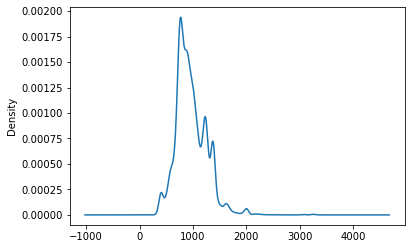

In [16]:
d2.cafe_avg_price_1000.plot.kde()

In [17]:
d2[d2.cafe_avg_price_1000.isnull()].index.to_list()

[9578,
 9579,
 9585,
 9588,
 9589,
 9596,
 9599,
 9608,
 9614,
 9620,
 9623,
 9625,
 9629,
 9631,
 9638,
 9641,
 9642,
 9645,
 9647,
 9652,
 9653,
 9654,
 9655,
 9657,
 9658,
 9660,
 9661,
 9662,
 9663,
 9664,
 9665,
 9666,
 9667,
 9668,
 9675,
 9677,
 9679,
 9681,
 9684,
 9687,
 9688,
 9689,
 9695,
 9699,
 9700,
 9704,
 9712,
 9715,
 9716,
 9719,
 9720,
 9724,
 9733,
 9734,
 9739,
 9742,
 9745,
 9750,
 9758,
 9760,
 9768,
 9769,
 9773,
 9780,
 9789,
 9790,
 9798,
 9799,
 9803,
 9806,
 9808,
 9809,
 9811,
 9812,
 9821,
 9822,
 9825,
 9829,
 9832,
 9833,
 9835,
 9839,
 9844,
 9846,
 9847,
 9848,
 9856,
 9858,
 9861,
 9866,
 9869,
 9875,
 9881,
 9887,
 9888,
 9889,
 9892,
 9896,
 9897,
 9900,
 9901,
 9905,
 9906,
 9910,
 9917,
 9920,
 9925,
 9927,
 9929,
 9935,
 9936,
 9937,
 9947,
 9949,
 9952,
 9955,
 9956,
 9957,
 9958,
 9961,
 9962,
 9963,
 9972,
 9977,
 9979,
 9981,
 9982,
 9985,
 9986,
 9987,
 9992,
 9995,
 9998,
 10000,
 10001,
 10004,
 10005,
 10008,
 10009,
 10010,
 10012,
 1001

In [158]:
d2.state.nunique()

5

In [159]:
d2.state.value_counts()

2.0     5747
3.0     5684
1.0     4836
4.0      411
33.0       1
Name: state, dtype: int64

In [160]:
d2.state.unique()

array([ 3.,  2., nan,  1.,  4., 33.])

In [18]:
d2[d2.state.isnull()].index.to_list()

[9575,
 9577,
 9579,
 9580,
 9582,
 9584,
 9585,
 9587,
 9588,
 9589,
 9590,
 9591,
 9594,
 9595,
 9596,
 9598,
 9599,
 9600,
 9606,
 9607,
 9608,
 9609,
 9610,
 9613,
 9614,
 9615,
 9616,
 9617,
 9619,
 9622,
 9623,
 9624,
 9625,
 9626,
 9627,
 9628,
 9629,
 9630,
 9631,
 9632,
 9633,
 9634,
 9637,
 9638,
 9639,
 9640,
 9641,
 9642,
 9643,
 9645,
 9646,
 9647,
 9648,
 9649,
 9650,
 9652,
 9653,
 9654,
 9655,
 9656,
 9657,
 9658,
 9659,
 9660,
 9661,
 9662,
 9663,
 9664,
 9665,
 9666,
 9667,
 9668,
 9671,
 9673,
 9675,
 9677,
 9679,
 9680,
 9681,
 9682,
 9685,
 9688,
 9689,
 9691,
 9692,
 9693,
 9695,
 9697,
 9698,
 9699,
 9701,
 9702,
 9704,
 9705,
 9707,
 9708,
 9709,
 9710,
 9711,
 9713,
 9714,
 9716,
 9719,
 9721,
 9726,
 9727,
 9733,
 9734,
 9736,
 9738,
 9739,
 9740,
 9741,
 9742,
 9744,
 9750,
 9751,
 9752,
 9755,
 9756,
 9757,
 9758,
 9760,
 9761,
 9763,
 9766,
 9768,
 9770,
 9771,
 9772,
 9773,
 9776,
 9777,
 9779,
 9784,
 9785,
 9787,
 9788,
 9789,
 9790,
 9792,
 9797,
 9798,

In [19]:
d2.cafe_avg_price_1000.iloc[9572:9620]

19144     860.71
19145     886.36
19146     658.33
19147    1375.00
19148    1238.89
19149     750.00
19150     880.00
19151    2125.00
19152        NaN
19153    1250.00
19154     796.15
19155     976.39
19156        NaN
19157    1080.77
19158     912.50
19159    1021.95
19160     941.67
19161     710.00
19162     470.00
19163     750.00
19164     975.00
19165    1492.31
19166     692.86
19167     633.33
19168     825.00
19169     400.00
19170     806.25
19171    1375.00
19172    1050.00
19173        NaN
19174        NaN
19175     866.67
19176     705.88
19177    1081.82
19178    1250.00
19179     855.00
19180     400.00
19181        NaN
19182     921.43
19183     633.33
19184    1120.00
19185    1031.25
19186    1000.00
19187     880.00
19188     750.00
19189        NaN
19190        NaN
19191        NaN
Name: cafe_avg_price_1000, dtype: float64

In [152]:
d2.life_sq.median()

30.0

In [153]:
d2.life_sq.mode()

0    19.0
dtype: float64

In [164]:
d2.state.iloc[9572:9620]

19144    2.0
19145    3.0
19146    2.0
19147    NaN
19148    2.0
19149    2.0
19150    2.0
19151    3.0
19152    1.0
19153    1.0
19154    1.0
19155    2.0
19156    1.0
19157    3.0
19158    2.0
19159    1.0
19160    2.0
19161    NaN
19162    2.0
19163    1.0
19164    2.0
19165    2.0
19166    3.0
19167    2.0
19168    2.0
19169    3.0
19170    3.0
19171    2.0
19172    2.0
19173    2.0
19174    3.0
19175    3.0
19176    4.0
19177    2.0
19178    1.0
19179    2.0
19180    2.0
19181    3.0
19182    2.0
19183    1.0
19184    3.0
19185    2.0
19186    2.0
19187    1.0
19188    NaN
19189    3.0
19190    3.0
19191    1.0
Name: state, dtype: float64

In [141]:
d2[['build_year']].corrwith(d2['life_sq'])

build_year   -0.002405
dtype: float64

In [131]:
d2[['cafe_sum_500_max_price_avg']].corrwith(d2['cafe_sum_500_min_price_avg'])

cafe_sum_500_max_price_avg    0.987947
dtype: float64

In [133]:
d2[['cafe_sum_500_max_price_avg','cafe_sum_500_min_price_avg']].corrwith(d2['cafe_avg_price_500'])

cafe_sum_500_max_price_avg    0.998145
cafe_sum_500_min_price_avg    0.995538
dtype: float64

In [95]:
d3 = df.dropna()

In [96]:
d3.shape

(6042, 292)

In [62]:
d2['build_count_wood'].unique()

array([  1.,   0.,   7.,  51.,  nan,  22.,  71., 161.,   2.,  39., 607.,
        11.,  16.,  27.,   5.,  31.,   4., 372., 352.,  99.,   6., 116.,
        42., 793., 204.,  14., 146.,   3., 774.,  81.,  15.,  21.,  97.,
       121., 652.])

In [65]:
d2['build_count_wood'].describe()

count    17579.000000
mean        42.318903
std        128.905834
min          0.000000
25%          0.000000
50%          0.000000
75%         11.000000
max        793.000000
Name: build_count_wood, dtype: float64

In [68]:
 import glob

In [67]:
d2['wooden_bld_around'].value_counts()

1    16298
3      429
4      336
2      323
5      193
Name: wooden_bld_around, dtype: int64

In [75]:
for column in numeric:
     if 'build_count_' in column:
            print(column)
    
    

raion_build_count_with_material_info
build_count_block
build_count_wood
build_count_frame
build_count_brick
build_count_monolith
build_count_panel
build_count_foam
build_count_slag
build_count_mix
raion_build_count_with_builddate_info
build_count_before_1920
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995


In [91]:
uni={}
for col in df.columns:
    k = col.split('_')[0]
    if k in uni:
        uni[k].append(col)
    else:
        uni[k] = []

In [93]:
uni_cnt= {}
for i in uni:
    uni_cnt[i] = len(uni[i])


In [94]:
uni_cnt

{'id': 0,
 'timestamp': 0,
 'full': 1,
 'life': 0,
 'floor': 0,
 'max': 0,
 'material': 0,
 'build': 14,
 'num': 0,
 'kitch': 0,
 'state': 0,
 'product': 0,
 'sub': 0,
 'area': 0,
 'raion': 2,
 'green': 7,
 'indust': 0,
 'children': 1,
 'preschool': 2,
 'school': 3,
 'hospital': 0,
 'healthcare': 0,
 'university': 1,
 'sport': 6,
 'additional': 1,
 'culture': 1,
 'shopping': 1,
 'office': 13,
 'thermal': 1,
 'incineration': 1,
 'oil': 1,
 'radiation': 1,
 'railroad': 6,
 'big': 11,
 'nuclear': 1,
 'detention': 1,
 'male': 0,
 'female': 0,
 'young': 2,
 'work': 2,
 'ekder': 2,
 '0': 8,
 '7': 2,
 '16': 2,
 'ID': 6,
 'metro': 3,
 'kindergarten': 0,
 'park': 0,
 'industrial': 0,
 'water': 2,
 'cemetery': 0,
 'public': 2,
 'mkad': 0,
 'ttk': 0,
 'sadovoe': 0,
 'bulvar': 0,
 'kremlin': 0,
 'zd': 0,
 'bus': 0,
 'power': 0,
 'ts': 0,
 'market': 6,
 'fitness': 0,
 'swim': 0,
 'ice': 0,
 'stadium': 0,
 'basketball': 0,
 'hospice': 0,
 'workplaces': 0,
 'church': 6,
 'mosque': 6,
 'theater': 0,
 